## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [61]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [62]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [63]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [64]:
y.backward()

In [65]:
x.grad

tensor([6.])

In [66]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)

tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [67]:
# your code here

import torch

# the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# first point
x1 = torch.tensor([2.0], requires_grad=True)

# second point
x2 = torch.tensor([3.0], requires_grad=True)

# sigmoid activation function for x1 and x2
y1 = sigmoid(x1)
y2 = sigmoid(x2)

# gradient of y1 with respect to x1
y1.backward()
print("Gradient of y1: ", x1.grad)

# gradient of y2 with respect to x2
y2.backward()
print("Gradient of y2: ", x2.grad)

# the known explicit formula for the gradient of the sigmoid function
exp_grad_y1 = y1 * (1 - y1)
exp_grad_y2 = y2 * (1 - y2)
print("\nKnown explicit formula for the gradient of the sigmoid function for y1: ", exp_grad_y1)
print("Known explicit formula for the gradient of the sigmoid function for y2: ", exp_grad_y2)

Gradient of y1:  tensor([0.1050])
Gradient of y2:  tensor([0.0452])

Known explicit formula for the gradient of the sigmoid function for y1:  tensor([0.1050], grad_fn=<MulBackward0>)
Known explicit formula for the gradient of the sigmoid function for y2:  tensor([0.0452], grad_fn=<MulBackward0>)


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [68]:
# your code here

import torch

# the linear function
def linear(x):
    return x

# first point
x1 = torch.tensor([2.0], requires_grad=True)

# second point
x2 = torch.tensor([3.0], requires_grad=True)

# linear activation function for x1 and x2
y1 = linear(x1)
y2 = linear(x2)

# gradient of y1 with respect to x1
y1.backward()
print("Gradient of y1: ", x1.grad)

# gradient of y2 with respect to x2
y2.backward()
print("Gradient of y2: ", x2.grad)

# the known explicit formula for the gradient of the linear function
exp_grad_y1 = y1 * (1 - y1)
exp_grad_y2 = y2 * (1 - y2)
print("\nKnown explicit formula for the gradient of the linear function for y1: ", exp_grad_y1)
print("Known explicit formula for the gradient of the linear function for y2: ", exp_grad_y2)

Gradient of y1:  tensor([1.])
Gradient of y2:  tensor([1.])

Known explicit formula for the gradient of the linear function for y1:  tensor([-2.], grad_fn=<MulBackward0>)
Known explicit formula for the gradient of the linear function for y2:  tensor([-6.], grad_fn=<MulBackward0>)


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [69]:
# your code here

import torch

# the ReLU activation function
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# first point
x1 = torch.tensor([2.0], requires_grad=True)

# second point
x2 = torch.tensor([3.0], requires_grad=True)

# relu activation function for x1 and x2
y1 = relu(x1)
y2 = relu(x2)

# gradient of y1 with respect to x1
y1.backward()
print("Gradient of y1: ", x1.grad)

# gradient of y2 with respect to x2
y2.backward()
print("Gradient of y2: ", x2.grad)

# the known explicit formula for the gradient of the relu function
exp_grad_y1 = y1 * (1 - y1)
exp_grad_y2 = y2 * (1 - y2)
print("\nKnown explicit formula for the gradient of the relu function for y1: ", exp_grad_y1)
print("Known explicit formula for the gradient of the relu function for y2: ", exp_grad_y2)

Gradient of y1:  tensor([1.])
Gradient of y2:  tensor([1.])

Known explicit formula for the gradient of the relu function for y1:  tensor([-2.], grad_fn=<MulBackward0>)
Known explicit formula for the gradient of the relu function for y2:  tensor([-6.], grad_fn=<MulBackward0>)


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

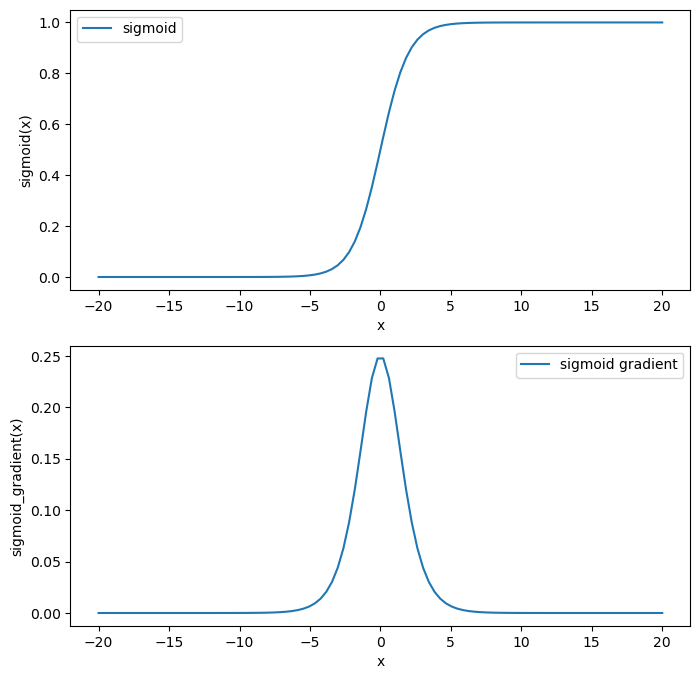

In [70]:
# your code here

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    s = sigmoid(x)
    return s * (1 - s)

# range of x values to plot
x = np.linspace(-20, 20, 100)

# sigmoid activation function and gradient at each x value
y = sigmoid(x)
y_grad = sigmoid_gradient(x)

# plot the sigmoid activation function and its gradient
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(x, y, label='sigmoid')
ax[0].set_xlabel('x')
ax[0].set_ylabel('sigmoid(x)')
ax[0].legend()

ax[1].plot(x, y_grad, label='sigmoid gradient')
ax[1].set_xlabel('x')
ax[1].set_ylabel('sigmoid_gradient(x)')
ax[1].legend()

plt.show()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

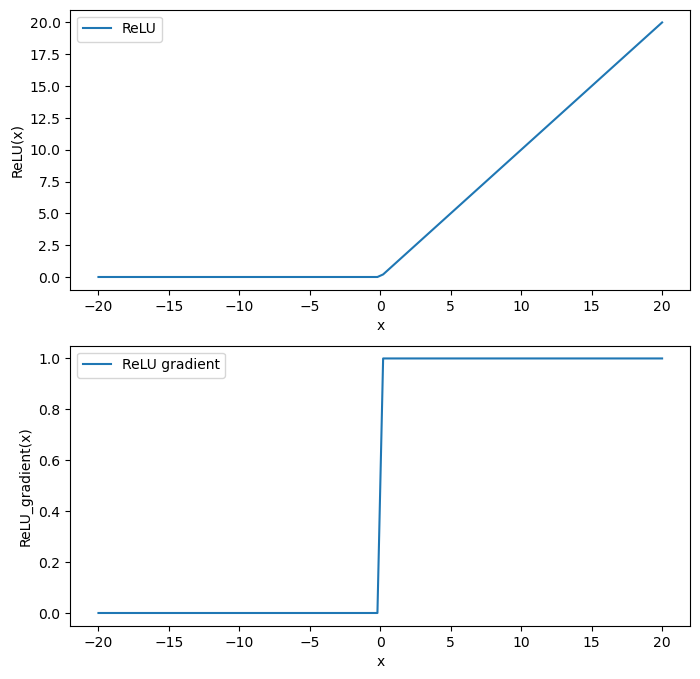

In [71]:
# your code here

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_gradient(x):
    return np.where(x > 0, 1, 0)

# range of x values to plot
x = np.linspace(-20, 20, 100)

# ReLU activation function and gradient at each x value
y = relu(x)
y_grad = relu_gradient(x)

# plot the ReLU activation function and its gradient
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(x, y, label='ReLU')
ax[0].set_xlabel('x')
ax[0].set_ylabel('ReLU(x)')
ax[0].legend()

ax[1].plot(x, y_grad, label='ReLU gradient')
ax[1].set_xlabel('x')
ax[1].set_ylabel('ReLU_gradient(x)')
ax[1].legend()

plt.show()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

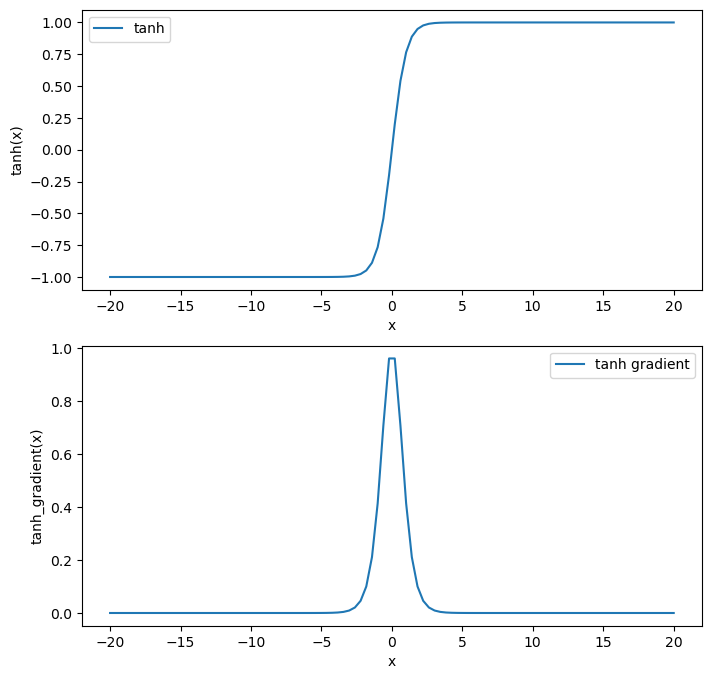

In [72]:
# your code here

import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_gradient(x):
    return 1 - np.square(np.tanh(x))

# range of x values to plot
x = np.linspace(-20, 20, 100)

# tanh activation function and gradient at each x value
y = tanh(x)
y_grad = tanh_gradient(x)

# plot the tanh activation function and its gradient
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(x, y, label='tanh')
ax[0].set_xlabel('x')
ax[0].set_ylabel('tanh(x)')
ax[0].legend()

ax[1].plot(x, y_grad, label='tanh gradient')
ax[1].set_xlabel('x')
ax[1].set_ylabel('tanh_gradient(x)')
ax[1].legend()

plt.show()

Exercise 7. 

Write in python a function to plot the softmax activation function.

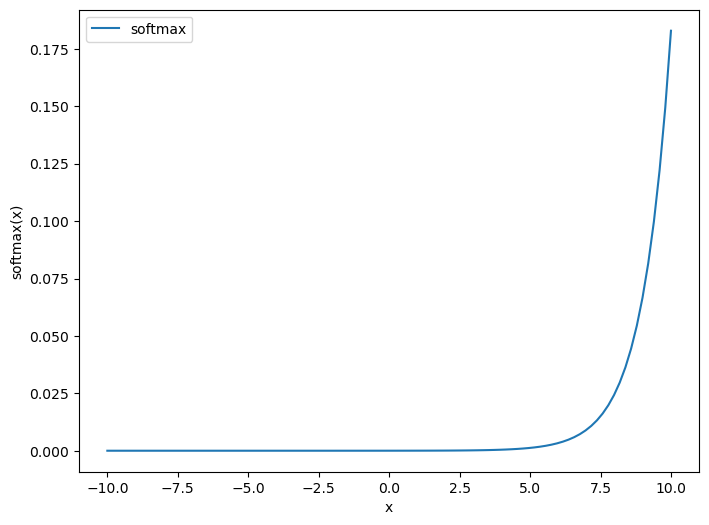

In [73]:
# your code here

import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

# range of x values to plot
x = np.linspace(-10, 10, 100)

# softmax activation function at each x value
y = softmax(x)

# plot the softmax activation function
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y, label='softmax')
ax.set_xlabel('x')
ax.set_ylabel('softmax(x)')
ax.legend()

plt.show()

Exercise 8. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

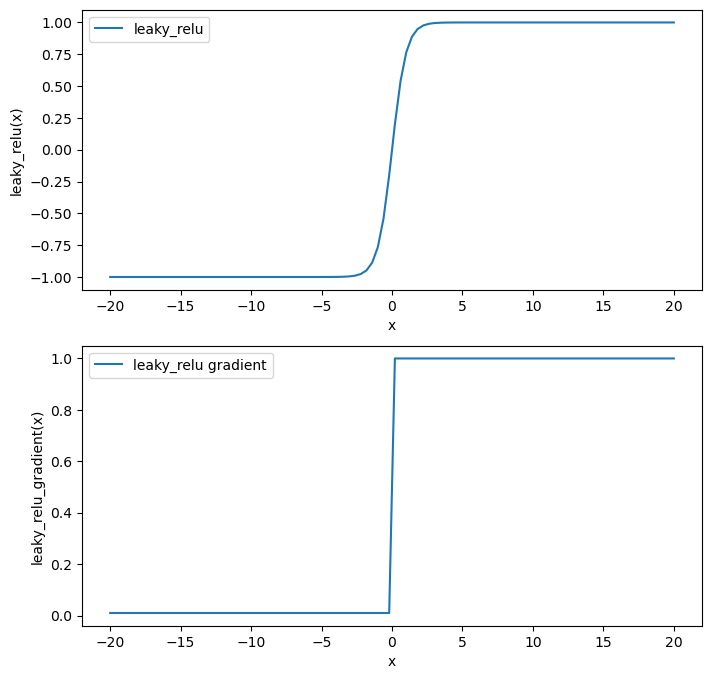

In [74]:
# your code here

import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# range of x values to plot
x = np.linspace(-20, 20, 100)

# leaky_relu activation function and gradient at each x value
y = tanh(x)
y_grad = leaky_relu_gradient(x)

# plot the leaky_relu activation function and its gradient
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(x, y, label='leaky_relu')
ax[0].set_xlabel('x')
ax[0].set_ylabel('leaky_relu(x)')
ax[0].legend()

ax[1].plot(x, y_grad, label='leaky_relu gradient')
ax[1].set_xlabel('x')
ax[1].set_ylabel('leaky_relu_gradient(x)')
ax[1].legend()

plt.show()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [75]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [76]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.3902], grad_fn=<SigmoidBackward0>)


In [77]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4635
Epoch [200/1000], Loss: 0.4115
Epoch [300/1000], Loss: 0.3947
Epoch [400/1000], Loss: 0.3872
Epoch [500/1000], Loss: 0.3834
Epoch [600/1000], Loss: 0.3813
Epoch [700/1000], Loss: 0.3800
Epoch [800/1000], Loss: 0.3792
Epoch [900/1000], Loss: 0.3788
Epoch [1000/1000], Loss: 0.3785


Exercise 9: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


# custom dataset for the OR function
class ORDataset(Dataset):
    # defining the input features and the target labels
    def __init__(self):
        self.x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
        self.y = torch.tensor([[0],[1], [1], [1]], dtype=torch.float32)
        
    # length of the dataset
    def __len__(self):
        return len(self.x)
    
    # function to retrieve a (feature, target) pair based on its index
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    

# Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # single linear layer with 2 input neurons and 1 output neuron
        
        
    def forward(self, x):
        x = self.fc(x)  # apply the linear transformation to the input
        return x

    
# Create an ORdataset and a DataLoader
# Dataset stores the samples and their corresponding labels
# DataLoader wraps an iterable around the Dataset to enable easy access to the samples
dataset = ORDataset()  
loader = DataLoader(dataset, batch_size=4, shuffle=True)  # iterate over the dataset in batches of size 4

# Create instance of Perceptron class
model = Perceptron()

# Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.
criterion = nn.BCEWithLogitsLoss()

# Define a stochastic gradient descent optimizer using the torch.optim.SGD module.
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(dataset.x)
    loss = criterion(outputs, dataset.y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Evaluate the trained model compute the accuracy.

Epoch [100/1000], Loss: 0.7388
Epoch [200/1000], Loss: 0.6051
Epoch [300/1000], Loss: 0.5352
Epoch [400/1000], Loss: 0.4936
Epoch [500/1000], Loss: 0.4652
Epoch [600/1000], Loss: 0.4438
Epoch [700/1000], Loss: 0.4263
Epoch [800/1000], Loss: 0.4111
Epoch [900/1000], Loss: 0.3976
Epoch [1000/1000], Loss: 0.3852
